In [2]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

%matplotlib inline

## Данные
загружаем данные по стерлитамаку

In [3]:
data = pd.read_csv('ufa.csv', encoding='utf-8')
data.rename(columns=lambda x: x[5:], inplace=True)

In [3]:
data.head()

,642,643,644,645,646,647,648,649,650,651,...,748,749,750,751,752,753,3460,3461,3495,3496
0,0,4,4,2,4,0,0,3,20,3,...,1,0,0,0,0,0,0,1,2,0
1,2,9,3,4,6,0,2,5,36,2,...,2,0,0,6,0,4,6,0,4,0
2,2,3,5,5,2,0,6,6,10,3,...,3,15,0,3,0,0,2,2,0,0
3,1101,788,994,998,881,434,789,563,801,480,...,566,828,5,458,13,68,554,392,50,69
4,10,2,4,7,3,0,3,0,27,0,...,5,10,0,1,0,1,4,0,3,0


In [4]:
golosa = data.sum().reset_index()
golosa = golosa.set_index('index')
golosa.head()

,0
index,
1,29095
2,32207
3,29500
4,30639
5,33071


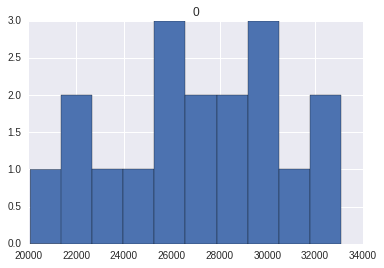

In [5]:
golosaplot = golosa.hist()
# golosaplot.set_title(u"Kolichestvo Golosov po uchastkam")

Распределение голосов по участкам, Медиана: 1254 голоса на участке, в среднем 469 голоса на участок

In [6]:
# data = data[data>50]
# data.head()

In [6]:
data_percent = data.apply(lambda x: (x*100 / x.sum()))
data_percent.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,48.723148,61.582886,39.301695,62.733771,57.303982,72.676165,41.774547,46.835618,49.793256,64.758614,50.838228,48.300806,51.292058,53.313310,52.384805,65.075868,66.605469,50.547054
1,17.494415,19.219424,14.742373,6.625543,17.250764,9.793151,9.943238,23.167142,19.718828,5.662572,19.223154,31.509400,16.974841,22.088735,17.831795,6.954895,6.105469,19.742828
2,6.657501,1.664234,4.477966,1.866902,5.433764,3.832289,5.038837,6.618526,9.179454,0.804051,7.217345,4.605192,4.137617,4.269475,5.093223,5.404282,4.140625,3.996691
3,22.601822,14.366442,16.664407,24.759294,15.303438,12.376620,36.033659,20.692669,16.245521,27.833852,17.804105,14.184423,19.331616,18.374330,19.379987,19.941800,20.453125,21.652818
4,4.523114,3.167013,24.813559,4.014491,4.708052,1.321775,7.209719,2.686045,5.062942,0.940911,4.917167,1.400179,8.263868,1.954150,5.310190,2.623155,2.695312,4.060608


In [8]:
edro = data_percent.transpose()[[0]]
edro = edro.sort_values(by=[0], ascending=[False])
edro = edro.rename(columns={0: 'EDRO'})
edro.describe()

,EDRO
count,18.000000
mean,54.657849
std,9.107886
min,39.301695
25%,48.990675
50%,51.838432
75%,62.446049
max,72.676165


### Участки с большими процентами за едро
http://www.bashkortostan.vybory.izbirkom.ru/bashkortostan/ik/4024049178662

In [9]:
edro.head(5)

,EDRO
6,72.676165
17,66.605469
16,65.075868
10,64.758614
4,62.733771


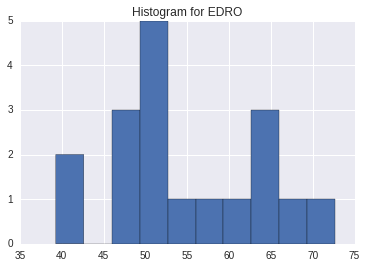

In [10]:
edro.hist()
plt.title('Histogram for EDRO')

Гистограма показывает что на большинстве участков близкое значение в 56%

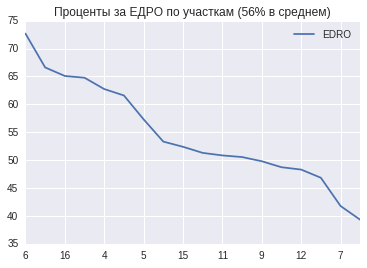

In [11]:
edro.plot(title=u'Проценты за ЕДРО по участкам (56% в среднем)')


Медиана в 56% почти на всех участках... причем настолько ровное распределение соотношения голосов за Единую России, вызывает удивление.

In [12]:
edro['golosa']=golosa
edro.head()

,EDRO,golosa
6,72.676165,23302
17,66.605469,25600
16,65.075868,24055
10,64.758614,29227
4,62.733771,30639


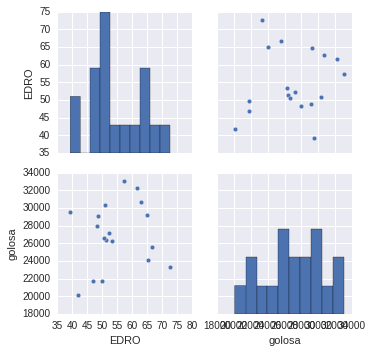

In [13]:
sns.pairplot(edro)

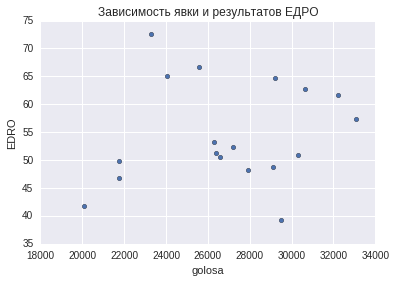

In [14]:
edro.plot.scatter(x='golosa', y='EDRO', title=u'Зависимость явки и результатов ЕДРО')